<a href="https://colab.research.google.com/github/Hani1-2/DeepLearningAssignmnt/blob/master/cats_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
import plotly.express as px

## Data Exploration

In [3]:
data = pd.read_excel('/content/FitBark_structured_clean.xlsx')
data.head()

,Date,Day,Cat.Id,Household.Id,Name,Breed,Age,Sex,Other.Cats,Desexed,...,Health.Index,Calories,Sleep.score,kms,Activity.Index,Play,Active,Rest,Notes,Activity.Total
0,44468,Wednesday,1,1,Tia,Burmese,1.0,F,0,1,...,74.0,305,85,4.39,124.0,43,591,806,NaN,1440
1,44469,Thursday,1,1,Tia,Burmese,1.0,F,0,1,...,75.0,282,68,3.80,101.0,40,603,797,NaN,1440
2,44470,Friday,1,1,Tia,Burmese,1.0,F,0,1,...,73.0,283,69,3.83,102.0,25,647,768,NaN,1440
3,44471,Saturday,1,1,Tia,Burmese,1.0,F,0,1,...,74.0,280,78,3.77,99.0,30,637,773,NaN,1440
4,44473,Monday,1,1,Tia,Burmese,1.0,F,0,1,...,74.0,293,65,4.10,108.0,36,606,798,NaN,1440


#### finding null values

In [4]:
data.isnull().sum()

Date                      0
Day                       0
Cat.Id                    0
Household.Id              0
Name                      0
Breed                     0
Age                     106
Sex                       0
Other.Cats                0
Desexed                   0
Microchipped           2731
Overall.Bark.points       0
Health.Index             42
Calories                  0
Sleep.score               0
kms                       0
Activity.Index           68
Play                      0
Active                    0
Rest                      0
Notes                  2711
Activity.Total            0
dtype: int64

#### finding categorical null values

In [5]:
# Checking Categorical Features in dataset and counting it 

cat_features = [columns_name for columns_name in data.columns if data[columns_name].dtype == "O"]
print("Number of Categorical Features we have in data is : {}  ".format(len(cat_features)))
print("Here is Listed features {} ".format(cat_features))
missing_cat = data[cat_features].isnull().sum() # Total missing values 
print(missing_cat)

Number of Categorical Features we have in data is : 5  
Here is Listed features ['Day', 'Name', 'Breed', 'Sex', 'Notes'] 
Day         0
Name        0
Breed       0
Sex         0
Notes    2711
dtype: int64


#### removing null values

In [6]:
cat_features_with_null = [features for features in cat_features if data[features].isnull().sum()]  # list will return with categorical features
for each_feature in cat_features_with_null:
  data[each_feature] = data[each_feature].fillna(data[each_feature].mode()[0])

#### finding null values of numerical features

In [7]:
# Checking Numerical Features in dataset and counting it 

num_features = [columns_name for columns_name in data.columns if data[columns_name].dtype != "O"]
print("Number of Numerical Features we have in data is : {}  ".format(len(num_features)))
print("Here is the Listed Numerical features {} ".format(num_features))
missing_num = data[num_features].isnull().sum()    # counting missing values in each  num_feature 
missing_num

Number of Numerical Features we have in data is : 17  
Here is the Listed Numerical features ['Date', 'Cat.Id', 'Household.Id', 'Age', 'Other.Cats', 'Desexed', 'Microchipped', 'Overall.Bark.points', 'Health.Index', 'Calories', 'Sleep.score', 'kms', 'Activity.Index', 'Play', 'Active', 'Rest', 'Activity.Total'] 


Date                      0
Cat.Id                    0
Household.Id              0
Age                     106
Other.Cats                0
Desexed                   0
Microchipped           2731
Overall.Bark.points       0
Health.Index             42
Calories                  0
Sleep.score               0
kms                       0
Activity.Index           68
Play                      0
Active                    0
Rest                      0
Activity.Total            0
dtype: int64

plotting null values of every feature

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

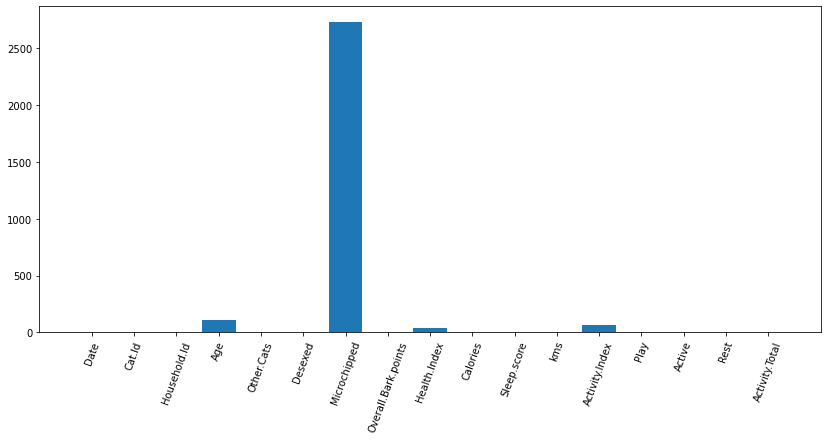

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.bar(missing_num.index,missing_num.values)    # ploting missing values 
plt.xticks(rotation=70)


In [9]:
for features in num_features:
  data[features] = data[features].fillna(data[features].mean())   # all missing values 

### dataset has 2757 rows and 22 columns

In [10]:
data.shape

(2757, 22)

In [11]:
data.columns

Index(['Date', 'Day', 'Cat.Id', 'Household.Id', 'Name', 'Breed', 'Age', 'Sex',
       'Other.Cats', 'Desexed', 'Microchipped', 'Overall.Bark.points',
       'Health.Index', 'Calories', 'Sleep.score', 'kms', 'Activity.Index',
       'Play', 'Active', 'Rest', 'Notes', 'Activity.Total'],
      dtype='object')

In [12]:
data.Age.unique()

array([1.        , 5.        , 2.        , 3.        , 6.        ,
       2.5       , 4.        , 3.31180687, 1.5       , 4.7       ,
       8.        , 3.5       ])

In [13]:
data[['Age']].value_counts()

Age     
2.000000    630
3.000000    532
4.000000    377
5.000000    340
1.000000    283
6.000000    186
3.500000    122
3.311807    106
8.000000     71
2.500000     51
4.700000     33
1.500000     26
dtype: int64

In [14]:
def cat_old(row):
  if 0 <= row['Age'] <= 0.6:
    return "Kitten "
  if 0.7 <= row['Age'] <= 2.0:
    return "Junior"
  if 3.0 <= row['Age'] <= 6:
    return "Adult"
  if 7.0 <= row['Age'] <= 10:
    return "Mature"

In [15]:
data['Life_Stage'] = data.apply(lambda row: cat_old(row), axis=1)
data.head()

,Date,Day,Cat.Id,Household.Id,Name,Breed,Age,Sex,Other.Cats,Desexed,...,Calories,Sleep.score,kms,Activity.Index,Play,Active,Rest,Notes,Activity.Total,Life_Stage
0,44468,Wednesday,1,1,Tia,Burmese,1.0,F,0,1,...,305,85,4.39,124.0,43,591,806,worked,1440,Junior
1,44469,Thursday,1,1,Tia,Burmese,1.0,F,0,1,...,282,68,3.80,101.0,40,603,797,worked,1440,Junior
2,44470,Friday,1,1,Tia,Burmese,1.0,F,0,1,...,283,69,3.83,102.0,25,647,768,worked,1440,Junior
3,44471,Saturday,1,1,Tia,Burmese,1.0,F,0,1,...,280,78,3.77,99.0,30,637,773,worked,1440,Junior
4,44473,Monday,1,1,Tia,Burmese,1.0,F,0,1,...,293,65,4.10,108.0,36,606,798,worked,1440,Junior


In [16]:
gk = data.groupby('Age')


## Data Visulaization

**Chart Explanation**

On X-axis --> We select Life Stage of Cats (i.e, kitten, junior, adult and mature)

On Y-axis --> we have count of values from our data

In [17]:
import plotly.express as px
fig = px.histogram(data, x="Life_Stage",color='Age',height=500, width=800)
fig.show()

This is plot shows the occurence of different breeds of cat in our dataset 

In [21]:
fig = px.histogram(data, x="Breed",color='Breed',height=500, width=1200)
fig.show()

This plot shows the activeness of cats while they are dexed or not. The active ratio is high when the cat is desexed

In [98]:
#Overall.Bark.points
fig = px.scatter(data, x="Desexed",y="Active",color='Desexed', height=400, width=600,range_x = [-1,2])
fig.show()

## Now we start plotting feature with our target variable OverallBarkPoints.

#### This plot shows when the cats is desexed it has higher bark points than the cats who is not desexed or have sex.

In [99]:
#Overall.Bark.points
fig = px.scatter(data, x="Desexed",y="Overall.Bark.points",color='Desexed', height=400, width=600,  range_y = [200,15000],range_x = [-1,2])
fig.show()

#### sex against bark points

In [42]:
#Overall.Bark.points
fig = px.bar(data, x="Sex",y="Overall.Bark.points",color='Sex', height=400, width=600, range_y = [200,15000])
fig.show()

#### the active the cat the more is bark points

In [83]:
fig = px.scatter(data, x="Active",y='Overall.Bark.points', height=400, width=600)
fig.show()

### Sum of Bark Points of different sex when the Life Stage of Cats is Junior.

In [66]:
data_j = data.iloc[list(data.Life_Stage == 'Junior')]
fig = px.histogram(data_j, x="Sex",y='Overall.Bark.points',color='Age', height =400, width = 700)
fig.show()

### Sum of Bark Points of different sex when the Life Stage of Cats is Adult.

In [67]:
data_j = data.iloc[list(data.Life_Stage == 'Adult')]
fig = px.histogram(data_j, x="Sex",y='Overall.Bark.points',color='Age', height =400, width = 700)
fig.show()

### Sum of Bark Points of different sex when the Life Stage of Cats is Mature.

In [68]:
data_j = data.iloc[list(data.Life_Stage == 'Mature')]
fig = px.histogram(data_j, x="Sex",y='Overall.Bark.points',color='Age', height =400, width = 700)
fig.show()

When you hover the chart, you'll get to know the rest and sleep score of each breed

In [75]:
fig = px.scatter(data, x="Rest", y="Sleep.score", color="Breed", hover_name="Breed",size_max=60)
fig.show()

In [84]:
data.columns

Index(['Date', 'Day', 'Cat.Id', 'Household.Id', 'Name', 'Breed', 'Age', 'Sex',
       'Other.Cats', 'Desexed', 'Microchipped', 'Overall.Bark.points',
       'Health.Index', 'Calories', 'Sleep.score', 'kms', 'Activity.Index',
       'Play', 'Active', 'Rest', 'Notes', 'Activity.Total', 'Life_Stage'],
      dtype='object')

We can see the inverse relation, the more the cat rest the less are the barkpoints

In [91]:
fig = px.scatter(data, x="Rest", y="Overall.Bark.points", color = 'Sex')
fig.show()